# Data augmentation with Keras

### Instalando bibliotecas

In [1]:
import matplotlib
%matplotlib inline

In [2]:
from kerasDataAugmentation.pyimagesearch.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.utils import np_utils
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

Using TensorFlow backend.


### Hiperparametros, Carregamento das Imagens, Normalização

In [3]:
# Inicialização dos parâmetros learning rate, batch size e epochs

INIT_LR = 1e-1
BS = 8
EPOCHS = 50

In [4]:
# Carregando imagens e labels

data = []
labels = []

imagePaths = list(paths.list_images('/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/kerasDataAugmentation/dogs_vs_cats_small'))

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (64, 64))
    
    labels.append(label)
    data.append(image)

In [5]:
# Normalizando imagens
# Convertento em um array com range de [0:1]

data = np.array(data, dtype= 'f') / 255.

In [6]:
# Encoder nas labels

le = LabelEncoder()
labels = le.fit_transform(labels)
labels = np_utils.to_categorical(labels)

### Separando dados em treino e teste

In [7]:
# Separando os dados em treino e teste

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, random_state=42)

In [8]:
print(x_train.shape)
print(y_train.shape)
print("------------")
print(x_test.shape)
print(y_test.shape)

(1500, 64, 64, 3)
(1500, 2)
------------
(500, 64, 64, 3)
(500, 2)


### Inicializando data augmentation

In [9]:
aug = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.12,
        horizontal_flip=True,
        fill_mode='nearest')

### Compile e Fit no modelo

In [10]:
# Configurando parâmetros de otimização
opt = SGD(lr=INIT_LR, momentum=0.9 , decay= INIT_LR / EPOCHS)

# Criando modelo
# def build(width, height, depth, classes, stages, filters, reg=0.0001, bnEps=2e-5, bnMom=0.9)
model = ResNet.build(64, 64, 3, 2, (2, 3, 4), (32, 64, 128, 256), reg = 0.0001)
model.compile(loss='binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# Treinando o modelo
h = model.fit_generator(
        aug.flow(x_train, y_train, batch_size = BS),
        validation_data=(x_test, y_test),
        steps_per_epoch=len(x_train) // BS,
        epochs=EPOCHS)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
187/187 [==============================] - 78s 419ms/step - loss: 1.0832 - acc: 0.5080 - val_loss: 0.9230 - val_acc: 0.4860
Epoch 2/50
187/187 [==============================] - 71s 380ms/step - loss: 0.9153 - acc: 0.5328 - val_loss: 0.8865 - val_acc: 0.5280
Epoch 3/50
187/187 [==============================] - 67s 359ms/step - loss: 0.8987 - acc: 0.5307 - val_loss: 0.9061 - val_acc: 0.5180
Epoch 4/50
187/187 [==============================] - 68s 366ms/step - loss: 0.8847 - acc: 0.5434 - val_loss: 0.8708 - val_acc: 0.5800
Epoch 5/50
187/187 [==============================] - 67s 356ms/step - loss: 0.8749 - acc: 0.5635 - val_loss: 0.8695 - val_acc: 0.5660
Epoch 6/50
187/187 [==============================] - 69s 369ms/step - loss: 0.8708 - acc: 0.5628 - val_loss: 0.8582 - val_acc: 0.5820
Epoch 7/50
187/187 [==============================] - 68s 366ms/step - loss: 0.8618 - acc: 0.5582 - val_loss: 0.8642 - val_acc: 0.5500
Epoch 8

### Avaliação do modelo

In [12]:
preds = model.predict(x_test, batch_size = BS)
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1), target_names = le.classes_))

              precision    recall  f1-score   support

        cats       0.68      0.70      0.69       257
        dogs       0.68      0.66      0.67       243

    accuracy                           0.68       500
   macro avg       0.68      0.68      0.68       500
weighted avg       0.68      0.68      0.68       500



In [13]:
scores = model.evaluate(x_test, y_test)

500/500 [==============================] - 7s 13ms/step


In [14]:
scores

[0.7458597478866578, 0.6799999990463257]

### Plotando desempenho do modelo

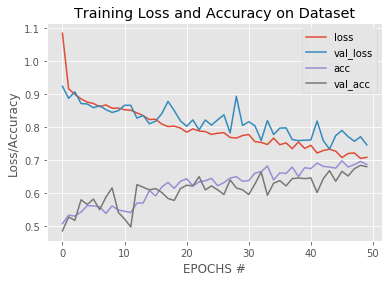

In [15]:
N = np.arange(0, EPOCHS)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, h.history['loss'], label = 'loss')
plt.plot(N, h.history['val_loss'], label ='val_loss')
plt.plot(N, h.history['acc'], label = 'acc')
plt.plot(N, h.history['val_acc'], label = 'val_acc')
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("EPOCHS #")
plt.ylabel("Loss/Accuracy")
plt.legend()


## Gerando novas imagens a partir de imagens específicas

In [17]:
# Library
from keras.preprocessing.image import img_to_array, load_img

In [18]:
# Carregando imagens e gerando novas imagens

imagePaths = list(paths.list_images('/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/kerasDataAugmentation/dogs_vs_cats_small/cats'))
dirCats = '/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/kerasDataAugmentation/generated_dataset/cats'
dirDogs = '/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/kerasDataAugmentation/generated_dataset/dogs'

for imagePath in imagePaths:
    total = 0
    image = load_img(imagePath, target_size=(64,64))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    imageGen = aug.flow(image, batch_size=1, save_to_dir=dirCats, save_prefix='cats', save_format='jpg')
    
    for image in imageGen:
        total +=1
        
        if total == 10:
            break

In [19]:
imagePaths = list(paths.list_images('/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/kerasDataAugmentation/dogs_vs_cats_small/dogs'))

for imagePath in imagePaths:
    total = 0
    image = load_img(imagePath, target_size=(64,64))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    imageGen = aug.flow(image, batch_size=1, save_to_dir=dirDogs, save_prefix='dogs', save_format='jpg')
    
    for image in imageGen:
        total +=1
        
        if total == 10:
            break

### Importando imagens usando ImageDataGenerator


In [20]:
dirtrain = '/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/kerasDataAugmentation/generated_dataset'
# Carregando imagens e labels

data2 = []
labels2 = []

imagePaths2 = list(paths.list_images(dirtrain))

for imagePath in imagePaths2:
    label2 = imagePath.split(os.path.sep)[-2]
    image2 = cv2.imread(imagePath)
    image2 = cv2.resize(image2, (64, 64))
    
    labels2.append(label2)
    data2.append(image2)

In [21]:
dirval = '/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/kerasDataAugmentation/dogs_vs_cats_small'

imagePaths2 = list(paths.list_images(dirval))

for imagePath in imagePaths2:
    label2 = imagePath.split(os.path.sep)[-2]
    image2 = cv2.imread(imagePath)
    image2 = cv2.resize(image2, (64, 64))
    
    labels2.append(label2)
    data2.append(image2)

In [22]:
# Normalizando imagens
# Convertento em um array com range de [0:1]

data2 = np.array(data2, dtype= 'f') / 255.

# Encoder nas labels

le = LabelEncoder()
labels2 = le.fit_transform(labels2)
labels2 = np_utils.to_categorical(labels2)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data2, labels2, test_size = 0.25, random_state=42)

In [24]:
print(x_train.shape)
print(y_train.shape)
print("------------")
print(x_test.shape)
print(y_test.shape)

(10984, 64, 64, 3)
(10984, 2)
------------
(3662, 64, 64, 3)
(3662, 2)


In [25]:
aug = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.12,
        horizontal_flip=True,
        fill_mode='nearest')

### Compilando e Fit no modelo

In [26]:
# Configurando parâmetros de otimização
opt = SGD(lr=INIT_LR, momentum=0.9 , decay= INIT_LR / EPOCHS)

# Criando modelo
# def build(width, height, depth, classes, stages, filters, reg=0.0001, bnEps=2e-5, bnMom=0.9)
model_2 = ResNet.build(64, 64, 3, 2, (2, 3, 4), (32, 64, 128, 256), reg = 0.0001)
model_2.compile(loss='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [ ]:
# Trainando modelo
# Treinando o modelo
h2 = model_2.fit_generator(
        aug.flow(x_train, y_train, batch_size = BS),
        validation_data=(x_test, y_test),
        steps_per_epoch=len(x_train) // BS,
        epochs=EPOCHS)

Epoch 1/50
1373/1373 [==============================] - 506s 369ms/step - loss: 0.9212 - acc: 0.5531 - val_loss: 0.8292 - val_acc: 0.6374
Epoch 2/50
1373/1373 [==============================] - 468s 341ms/step - loss: 0.8312 - acc: 0.6166 - val_loss: 0.7825 - val_acc: 0.6611
Epoch 3/50
1373/1373 [==============================] - 549s 400ms/step - loss: 0.8035 - acc: 0.6379 - val_loss: 0.7579 - val_acc: 0.6843
Epoch 4/50
1373/1373 [==============================] - 618s 450ms/step - loss: 0.7816 - acc: 0.6476 - val_loss: 0.7414 - val_acc: 0.7021
Epoch 5/50
1373/1373 [==============================] - 480s 349ms/step - loss: 0.7624 - acc: 0.6672 - val_loss: 0.7382 - val_acc: 0.6778
Epoch 6/50
1373/1373 [==============================] - 479s 349ms/step - loss: 0.7494 - acc: 0.6733 - val_loss: 0.7264 - val_acc: 0.6879
Epoch 7/50
1373/1373 [==============================] - 484s 353ms/step - loss: 0.7389 - acc: 0.6767 - val_loss: 0.6885 - val_acc: 0.7190
Epoch 8/50
1373/1373 [============

In [ ]:
preds = model_2.predict_generator(dataset_val, steps= len(dataset_val))


In [ ]:
preds.shape

### Avaliando o modelo

In [ ]:
preds = model.predict(x_test, batch_size = BS)
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1), target_names = le.classes_))

In [ ]:
scores = model.evaluate(x_test, y_test)

In [ ]:
scores

### Plotando o desempenho do modelo

In [ ]:
N = np.arange(0, EPOCHS)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, h2.history['loss'], label = 'loss')
plt.plot(N, h2.history['val_loss'], label ='val_loss')
plt.plot(N, h2.history['acc'], label = 'acc')
plt.plot(N, h2.history['val_acc'], label = 'val_acc')
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("EPOCHS #")
plt.ylabel("Loss/Accuracy")
plt.legend()